In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read csv
ramen = pd.read_csv('ramen-ratings/ramen-ratings.csv')

In [3]:
ramen.head(10)

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN
5,2575,Samyang Foods,Kimchi song Song Ramen,Pack,South Korea,4.75,NaN
6,2574,Acecook,Spice Deli Tantan Men With Cilantro,Cup,Japan,4,NaN
7,2573,Ikeda Shoku,Nabeyaki Kitsune Udon,Tray,Japan,3.75,NaN
8,2572,Ripe'n'Dry,Hokkaido Soy Sauce Ramen,Pack,Japan,0.25,NaN
9,2571,KOKA,The Original Spicy Stir-Fried Noodles,Pack,Singapore,2.5,NaN


In [4]:
# Remove Review column
ramen.drop(['Review #'], axis=1, inplace=True)
ramen.head(10)

,Brand,Variety,Style,Country,Stars,Top Ten
0,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN
5,Samyang Foods,Kimchi song Song Ramen,Pack,South Korea,4.75,NaN
6,Acecook,Spice Deli Tantan Men With Cilantro,Cup,Japan,4,NaN
7,Ikeda Shoku,Nabeyaki Kitsune Udon,Tray,Japan,3.75,NaN
8,Ripe'n'Dry,Hokkaido Soy Sauce Ramen,Pack,Japan,0.25,NaN
9,KOKA,The Original Spicy Stir-Fried Noodles,Pack,Singapore,2.5,NaN


In [5]:
ramen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 6 columns):
Brand      2580 non-null object
Variety    2580 non-null object
Style      2578 non-null object
Country    2580 non-null object
Stars      2580 non-null object
Top Ten    41 non-null object
dtypes: object(6)
memory usage: 121.0+ KB


In [6]:
# Missing values
ramen.isna().sum()

Brand         0
Variety       0
Style         2
Country       0
Stars         0
Top Ten    2539
dtype: int64

In [7]:
# Check missing values in Style
ramen[ramen['Style'].isna()==True]

,Brand,Variety,Style,Country,Stars,Top Ten
2152,Kamfen,E Menm Chicken,NaN,China,3.75,NaN
2442,Unif,100 Furong Shrimp,NaN,Taiwan,3,NaN


In [8]:
# Remove those two rows
ramen.dropna(subset=['Style'], inplace=True)

In [9]:
ramen.isna().sum()

Brand         0
Variety       0
Style         0
Country       0
Stars         0
Top Ten    2537
dtype: int64

In [10]:
# Lets see what we have in TopTen
ramen[ramen['Top Ten'].isnull()==False]

,Brand,Variety,Style,Country,Stars,Top Ten
616,MAMA,Instant Noodles Coconut Milk Flavour,Pack,Myanmar,5,2016 #10
633,Prima Taste,Singapore Laksa Wholegrain La Mian,Pack,Singapore,5,2016 #1
655,Prima,Juzz's Mee Creamy Chicken Flavour,Pack,Singapore,5,2016 #8
673,Prima Taste,Singapore Curry Wholegrain La Mian,Pack,Singapore,5,2016 #5
752,Tseng Noodles,Scallion With Sichuan Pepper Flavor,Pack,Taiwan,5,2016 #9
891,Wugudaochang,Tomato Beef Brisket Flavor Purple Potato Noodle,Pack,China,5,2016 #7
942,A-Sha Dry Noodle,Veggie Noodle Tomato Noodle With Vine Ripened ...,Pack,Taiwan,5,2015 #10
963,MyKuali,Penang Hokkien Prawn Noodle (New Improved Taste),Pack,Malaysia,5,2015 #7
995,CarJEN,Nyonya Curry Laksa,Pack,Malaysia,5,2015 #4
1059,Maruchan,Gotsumori Sauce Yakisoba,Tray,Japan,5,2015 #9


In [11]:
# Check unique values for brand
ramen['Brand'].value_counts()

Nissin                             381
Nongshim                            98
Maruchan                            76
Mama                                71
Paldo                               66
Myojo                               63
Indomie                             53
Samyang Foods                       52
Ottogi                              46
Vina Acecook                        34
Lucky Me!                           34
Vifon                               33
Maggi                               30
Mamee                               29
Master Kong                         28
MAMA                                27
A-Sha Dry Noodle                    26
Sapporo Ichiban                     25
Wai Wai                             25
KOKA                                25
Ve Wong                             24
MyKuali                             24
JML                                 23
Samyang                             19
Koka                                18
Doll                     

### So we have 355 different brands of ramen

In [12]:
# Top 5 brands
ramen['Brand'].value_counts().head(5)

Nissin      381
Nongshim     98
Maruchan     76
Mama         71
Paldo        66
Name: Brand, dtype: int64

### How many countries?

In [13]:
len(ramen['Country'].unique())

38

In [14]:
ramen['Country'].value_counts()

Japan            352
USA              323
South Korea      309
Taiwan           223
Thailand         191
China            168
Malaysia         156
Hong Kong        137
Indonesia        126
Singapore        109
Vietnam          108
UK                69
Philippines       47
Canada            41
India             31
Germany           27
Mexico            25
Australia         22
Netherlands       15
Nepal             14
Myanmar           14
Pakistan           9
Hungary            9
Bangladesh         7
Colombia           6
Cambodia           5
Brazil             5
Poland             4
Fiji               4
Holland            4
Dubai              3
Finland            3
Sarawak            3
Sweden             3
Ghana              2
Estonia            2
United States      1
Nigeria            1
Name: Country, dtype: int64

### Some country names don't match with our json dict, so we need to modify them a little

In [15]:
ramen.loc[ramen.Country=='United States', 'Country'] = 'United States of America'
ramen.loc[ramen.Country=='USA','Country'] = 'United States of America'

In [16]:
ramen.loc[ramen.Country=='Hong Kong', 'Country'] = 'China'

In [17]:
ramen.loc[ramen.Country=='Singapore', 'Country'] = 'Malaysia'

In [18]:
ramen.loc[ramen.Country=='UK', 'Country'] = 'United Kingdom'

In [19]:
ramen.loc[ramen.Country=='Holland', 'Country'] = 'Netherlands'

### How much does people love ramen?

In [20]:
rounded_stars = np.round(ramen['Stars'].replace('Unrated', np.nan).dropna().astype(np.float64))
y = rounded_stars.value_counts().sort_index()
y
# Reference https://www.kaggle.com/residentmario/ramen-lovers-just-love-eating

0.0      52
1.0      40
2.0     225
3.0     441
4.0    1367
5.0     450
Name: Stars, dtype: int64

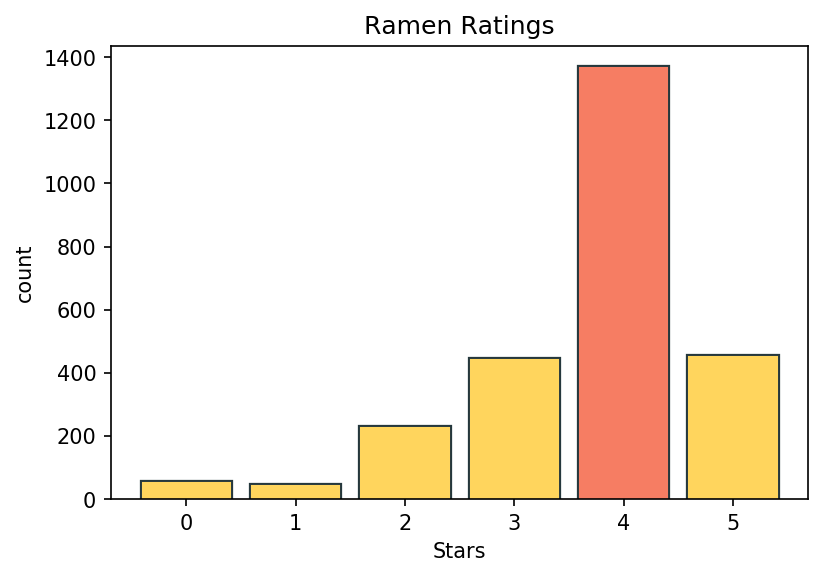

In [21]:
import matplotlib.patheffects as mpe
plt.figure(dpi=150)
outline=mpe.withStroke(linewidth=3, foreground='#25383d')
ratings_bar=plt.bar(y.index,y, path_effects=[outline])
ratings_bar[0].set_color('#ffd55d')
ratings_bar[1].set_color('#ffd55d')
ratings_bar[2].set_color('#ffd55d')
ratings_bar[3].set_color('#ffd55d')
ratings_bar[4].set_color('#f67d63')
ratings_bar[5].set_color('#ffd55d')
#threshold=500
#plt.plot([0,5.0], [threshold, threshold], "k--")
plt.title('Ramen Ratings')
plt.xlabel('Stars')
plt.ylabel('count')
#plt.tight_layout()
plt.savefig('ramen_ratings_count.png',dpi=150, transparent=True)
plt.show()

### Lets plot the ramen production per country

In [22]:
# Country data
country_data=pd.DataFrame(ramen['Country'].value_counts())
country_data.reset_index(inplace=True)
country_data.columns = ['country','count']
country_data.head()

,country,count
0,Japan,352
1,United States of America,324
2,South Korea,309
3,China,305
4,Malaysia,265


In [23]:
total_count = country_data['count'].sum()
total_count

2578

In [24]:
country_data['rate'] = country_data['count']/total_count*100
country_data.head()

,country,count,rate
0,Japan,352,13.653995
1,United States of America,324,12.567882
2,South Korea,309,11.986036
3,China,305,11.830877
4,Malaysia,265,10.279286


In [25]:
country_data.rate.head(4).sum()

50.03878975950349

In [26]:
# Get geo data
import folium
import os
#state_geo = pd.read_json('world-countries.json')
state_geo = os.path.join('folium/examples/data/', 'world-countries.json')

In [27]:
# Initialize the map:
m = folium.Map(location=None, zoom_start=5)

In [28]:
# Add the color for the chloropleth:
m.choropleth(
 geo_data=state_geo,
 name='choropleth',
 data=country_data,
 columns=['country', 'rate'],
 key_on='properties.name',
 fill_color='OrRd',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Ramen Production (%)'
)

# Source https://python-graph-gallery.com/292-choropleth-map-with-folium/

C:\Users\monic\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [29]:
folium.LayerControl().add_to(m)

In [30]:
m

In [31]:
# Save to html
m.save('#ramen_map.html')

In [32]:
lista_paises= country_data['country'].tolist()
lista_paises[1]='UnitedStates'
lista_paises[2]='SouthKorea'
lista_paises[9]='UnitedKingdom'
print(lista_paises)
texto_paises=' '.join(lista_paises)
texto_paises

['Japan', 'UnitedStates', 'SouthKorea', 'China', 'Malaysia', 'Taiwan', 'Thailand', 'Indonesia', 'Vietnam', 'UnitedKingdom', 'Philippines', 'Canada', 'India', 'Germany', 'Mexico', 'Australia', 'Netherlands', 'Nepal', 'Myanmar', 'Hungary', 'Pakistan', 'Bangladesh', 'Colombia', 'Cambodia', 'Brazil', 'Poland', 'Fiji', 'Sarawak', 'Finland', 'Dubai', 'Sweden', 'Ghana', 'Estonia', 'Nigeria']


'Japan UnitedStates SouthKorea China Malaysia Taiwan Thailand Indonesia Vietnam UnitedKingdom Philippines Canada India Germany Mexico Australia Netherlands Nepal Myanmar Hungary Pakistan Bangladesh Colombia Cambodia Brazil Poland Fiji Sarawak Finland Dubai Sweden Ghana Estonia Nigeria'

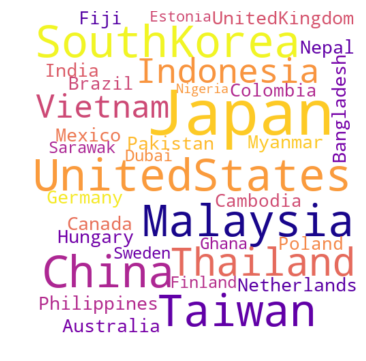

In [33]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
 
# Create a list of word
text= texto_paises
 
# Create the wordcloud object
wordcloud = WordCloud(width=480, height=480, margin=0,background_color='white', colormap='plasma').generate(text)
 
# Display the generated image:
plt.figure(figsize=[6,6])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.savefig('wordcloud_square', dpi=150, transparent=True)
plt.show()

# Reference https://python-graph-gallery.com/261-custom-python-wordcloud/

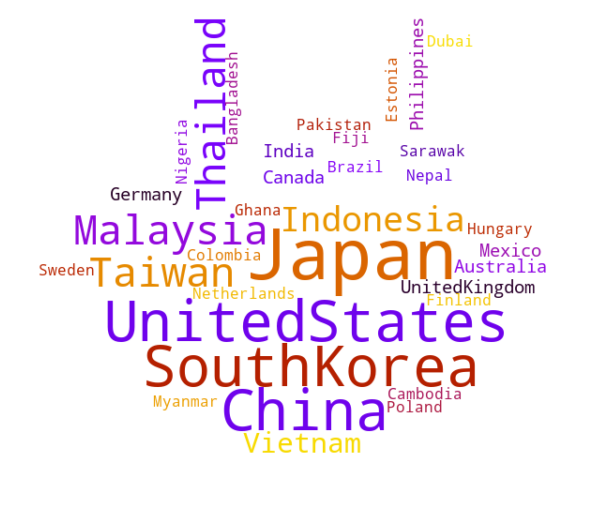

In [34]:
from PIL import Image    # to import the image
# Load the image (http://python-graph-gallery.com/wp-content/uploads/wave.jpg)
wave_mask = np.array(Image.open( "sopa.jpg"))
 
# Make the figure
wordcloud = WordCloud(mask=wave_mask, background_color='white', colormap='gnuplot').generate(text)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.savefig('wordcloud_ramen', dpi=150)
plt.show()


### Variety of ramen per brand

In [35]:
ramen[ramen['Brand']=='Nissin'].count() # There are 381 varieties of Nissin :0

Brand      381
Variety    381
Style      381
Country    381
Stars      381
Top Ten      1
dtype: int64

In [36]:
ramas=ramen.groupby('Brand', sort=False).Variety.count()
ramas

Brand
New Touch                            9
Just Way                             2
Nissin                             381
Wei Lih                             15
Ching's Secret                       4
Samyang Foods                       52
Acecook                             15
Ikeda Shoku                          2
Ripe'n'Dry                           3
KOKA                                25
Tao Kae Noi                          1
Yamachan                            11
Nongshim                            98
TRDP                                 1
Binh Tay                             3
Paldo                               66
Jackpot Teriyaki                     1
Yum-Mie                              1
MyKuali                             24
Ottogi                              46
Sichuan Guangyou                     4
Lipton                               1
Lele                                 1
Fujiwara                             7
Uni-President                       12
Maruchan           

In [37]:
ramas_df = pd.DataFrame(ramas)
ramas_df.head()

,Variety
Brand,
New Touch,9
Just Way,2
Nissin,381
Wei Lih,15
Ching's Secret,4


In [38]:
# Only brands over 50 varieties
ramas_df=ramas_df[ramas_df['Variety']>50].sort_values(by='Variety', ascending=True)
ramas_df

,Variety
Brand,
Samyang Foods,52
Indomie,53
Myojo,63
Paldo,66
Mama,71
Maruchan,76
Nongshim,98
Nissin,381


In [39]:
ramas_df.index

Index(['Samyang Foods', 'Indomie', 'Myojo', 'Paldo', 'Mama', 'Maruchan',
       'Nongshim', 'Nissin'],
      dtype='object', name='Brand')

In [40]:
ramas_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, Samyang Foods to Nissin
Data columns (total 1 columns):
Variety    8 non-null int64
dtypes: int64(1)
memory usage: 128.0+ bytes


In [41]:
ramas_df.reset_index(inplace=True)
ramas_df['label']=None
ramas_df

,Brand,Variety,label
0,Samyang Foods,52,None
1,Indomie,53,None
2,Myojo,63,None
3,Paldo,66,None
4,Mama,71,None
5,Maruchan,76,None
6,Nongshim,98,None
7,Nissin,381,None


In [42]:
ramas_df['label'] = ramas_df['Brand'] + ' - ' + (ramas_df['Variety'].astype(str) + ' types')
ramas_df

,Brand,Variety,label
0,Samyang Foods,52,Samyang Foods - 52 types
1,Indomie,53,Indomie - 53 types
2,Myojo,63,Myojo - 63 types
3,Paldo,66,Paldo - 66 types
4,Mama,71,Mama - 71 types
5,Maruchan,76,Maruchan - 76 types
6,Nongshim,98,Nongshim - 98 types
7,Nissin,381,Nissin - 381 types


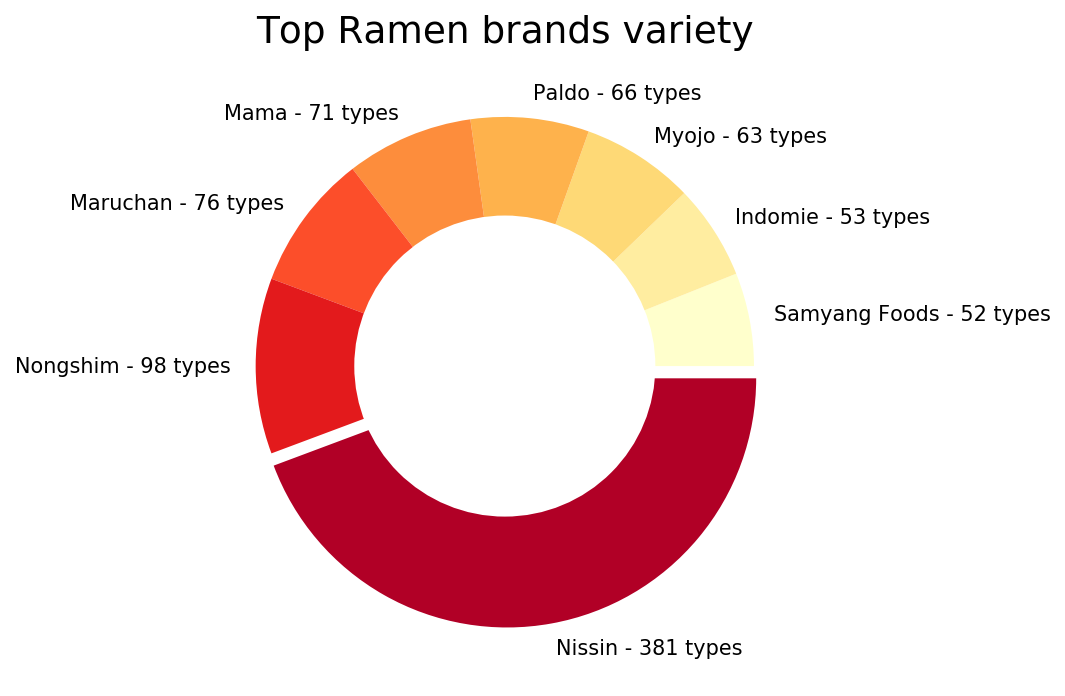

In [43]:
# create data
size=ramas_df['Variety']
 
# figsize
plt.figure(figsize=[8,5.5],dpi=150)

# title
plt.title("Top Ramen brands variety", fontsize=18)

# Enfasis
explode = (0, 0, 0, 0, 0, 0, 0, 0.05) 

# add a circle at the center
my_circle=plt.Circle( (0,0), 0.6, color='white')

from palettable.colorbrewer.sequential import YlOrRd_8
plt.pie(size, explode=explode, labels=ramas_df.label, colors=YlOrRd_8.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.savefig('donut_ramen_brands',dpi=150, transparent=True)
 
plt.show()

# Reference https://python-graph-gallery.com/donut-plot/

### Country popularity

In [44]:
ramen.groupby('Country').Brand.unique()

Country
Australia                       [Fantastic, Suimin, Singa-Me, Maggi, Trident]
Bangladesh                                                 [Pran, MAMA, Mama]
Brazil                                                               [Nissin]
Cambodia                                                         [MAMA, Mama]
Canada                      [Great Value, Azami, Western Family, No Name, ...
China                       [Nissin, Sichuan Guangyou, Uni-President, Sau ...
Colombia                                                             [Nissin]
Dubai                                                            [Golden Mie]
Estonia                                                              [Baltix]
Fiji                                                             [Maggi, FMF]
Finland                                                              [Pirkka]
Germany                                   [Nissin, Bonasia, Thai Chef, Bamee]
Ghana                                                   

In [45]:
ramen['Stars_int']=ramen['Stars'].replace('Unrated', np.nan).astype(float)
ramen.head()

,Brand,Variety,Style,Country,Stars,Top Ten,Stars_int
0,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN,3.75
1,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN,1.00
2,Nissin,Cup Noodles Chicken Vegetable,Cup,United States of America,2.25,NaN,2.25
3,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN,2.75
4,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN,3.75


In [46]:
country_rank=ramen.groupby('Country').Stars_int.mean()
country_rank=pd.DataFrame(country_rank)
country_rank.reset_index(inplace=True)
country_rank.head()

,Country,Stars_int
0,Australia,3.138636
1,Bangladesh,3.714286
2,Brazil,4.350000
3,Cambodia,4.200000
4,Canada,2.243902


In [47]:
# Initialize the map:
m = folium.Map(location=None, zoom_start=5)

In [48]:
# Add the color for the chloropleth:
m.choropleth(
 geo_data=state_geo,
 name='choropleth',
 data=country_rank,
 columns=['Country', 'Stars_int'],
 key_on='properties.name',
 fill_color='OrRd',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Ramen Popularity'
)
folium.LayerControl().add_to(m)
m
# Source https://python-graph-gallery.com/292-choropleth-map-with-folium/

In [49]:
# Save to html
m.save('#ramen_rating_map.html')

### Type of presentation

In [50]:
ramen.groupby('Style').Brand.unique()

Style
Bar                                [Komforte Chockolates]
Bowl    [Nissin, Samyang Foods, MyKuali, Sichuan Guang...
Box     [Lipton, The Ramen Rater Select, MyKuali, La F...
Can                                            [Pringles]
Cup     [New Touch, Nissin, Acecook, KOKA, Samyang Foo...
Pack    [Just Way, Wei Lih, Ching's Secret, Samyang Fo...
Tray    [Ikeda Shoku, Acecook, Guava Story, Myojo, Lia...
Name: Brand, dtype: object

In [51]:
presentation = ramen.groupby('Style').Brand.value_counts()
presentation

Style  Brand                          
Bar    Komforte Chockolates                1
Bowl   Nissin                             71
       Nongshim                           30
       Myojo                              21
       Maruchan                           17
       Paldo                              17
       JML                                11
       Samyang Foods                      11
       Lucky Me!                          10
       Ve Wong                            10
       Little Cook                         8
       Menraku                             8
       Ottogi                              8
       Sunlee                              8
       Dragonfly                           7
       Mee Jang                            7
       Saigon Ve Wong                      7
       Unif                                7
       Vifon                               7
       Acecook                             6
       New Touch                           6
       Wang     

In [52]:
bowl_count = presentation['Bowl'].sum()
box_count = presentation['Box'].sum()
cup_count = presentation['Cup'].sum()
pack_count = presentation['Pack'].sum()
tray_count = presentation['Tray'].sum()

In [53]:
print(bowl_count,box_count,cup_count,pack_count,tray_count)

481 6 450 1531 108


#### wtf pringles has ramen!!?

![pringles](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQAC4Z5IEXSy9VRsApRYeW1npLTo-vN-iC3-VRhHCj1sbDTy4Jr)

### Top 10 Ramen

In [54]:
# Lets see what we have in TopTen
top = ramen[ramen['Top Ten'].isnull()==False]
top = top[top['Top Ten']!='\n']
top.head()

,Brand,Variety,Style,Country,Stars,Top Ten,Stars_int
616,MAMA,Instant Noodles Coconut Milk Flavour,Pack,Myanmar,5,2016 #10,5.0
633,Prima Taste,Singapore Laksa Wholegrain La Mian,Pack,Malaysia,5,2016 #1,5.0
655,Prima,Juzz's Mee Creamy Chicken Flavour,Pack,Malaysia,5,2016 #8,5.0
673,Prima Taste,Singapore Curry Wholegrain La Mian,Pack,Malaysia,5,2016 #5,5.0
752,Tseng Noodles,Scallion With Sichuan Pepper Flavor,Pack,Taiwan,5,2016 #9,5.0


In [55]:
# Lets count the top ten marks by rating
top.Brand.value_counts().head()

Prima Taste    5
Nongshim       3
MyKuali        3
Mama           3
Indomie        3
Name: Brand, dtype: int64

In [56]:
top['year']=top['Top Ten'].str.slice(stop=4)

In [57]:
top['#']=top['Top Ten'].str.slice(start=6)
top.head()

,Brand,Variety,Style,Country,Stars,Top Ten,Stars_int,year,#
616,MAMA,Instant Noodles Coconut Milk Flavour,Pack,Myanmar,5,2016 #10,5.0,2016,10
633,Prima Taste,Singapore Laksa Wholegrain La Mian,Pack,Malaysia,5,2016 #1,5.0,2016,1
655,Prima,Juzz's Mee Creamy Chicken Flavour,Pack,Malaysia,5,2016 #8,5.0,2016,8
673,Prima Taste,Singapore Curry Wholegrain La Mian,Pack,Malaysia,5,2016 #5,5.0,2016,5
752,Tseng Noodles,Scallion With Sichuan Pepper Flavor,Pack,Taiwan,5,2016 #9,5.0,2016,9


In [58]:
consecutive_top = top.Brand.value_counts().head(10)
consecutive_top = pd.DataFrame(consecutive_top).reset_index()
consecutive_top.rename(columns={'index': 'Brand', 'Brand': 'count'}, inplace=True)
consecutive_top

,Brand,count
0,Prima Taste,5
1,Nongshim,3
2,MyKuali,3
3,Mama,3
4,Indomie,3
5,Mamee,2
6,Myojo,2
7,Sapporo Ichiban,2
8,Paldo,2
9,A-Sha Dry Noodle,1


### Top ramen vs rank average

In [59]:
# MEAN RANK
mean = round(ramen['Stars_int'].mean(),2)
mean

3.65

In [60]:
brand_mean = ramen.groupby('Brand').Stars_int.mean().round(2)
brand_mean = pd.DataFrame(brand_mean).reset_index()
brand_mean.head()

,Brand,Stars_int
0,1 To 3 Noodles,4.00
1,7 Select,3.75
2,7 Select/Nissin,3.50
3,A-One,2.75
4,A-Sha Dry Noodle,4.07


In [61]:
top_brand_mean = brand_mean.merge(consecutive_top, on='Brand')
top_brand_mean.sort_values(by='Stars_int', inplace=True, ascending=False)
top_brand_mean.rename(columns={'Stars_int': 'Rank'}, inplace=True)
top_brand_mean

,Brand,Rank,count
8,Prima Taste,5.00,5
4,MyKuali,4.95,3
0,A-Sha Dry Noodle,4.07,1
1,Indomie,4.07,3
7,Paldo,4.02,2
6,Nongshim,4.00,3
3,Mamee,3.94,2
9,Sapporo Ichiban,3.83,2
5,Myojo,3.80,2
2,Mama,3.63,3


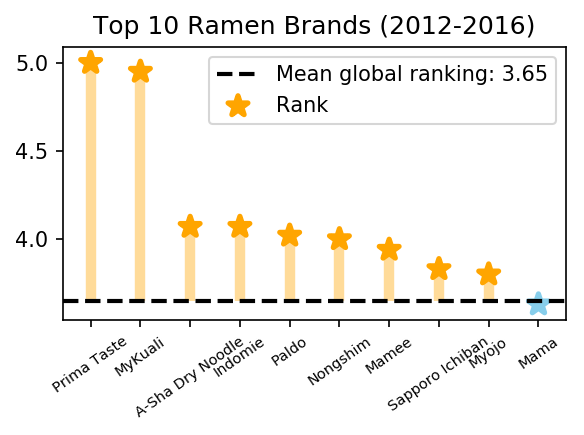

In [62]:
# Data
x = top_brand_mean.Brand
y = top_brand_mean.Rank
 
plt.figure(figsize=[4,3],dpi=150)

# Create a color if the group is "B"
my_color=np.where(y>=mean, 'orange', 'skyblue')
 
# The vertival plot is made using the hline function
# I load the seaborn library only to benefit the nice looking feature
plt.vlines(x=x, ymin=mean, ymax=y, color=my_color, alpha=0.4,lw=5)
plt.scatter(x, y, color=my_color, s=100, alpha=1, lw=2.5, marker='*')

# Threshold
#threshold=mean
# plt.plot([0,9], [threshold, threshold], "k--", lw=0.8, label='owo')
plt.axhline(y=mean, color='black', linestyle='--', lw=2, label='Mean global ranking: 3.65')
plt.legend()

# Add title and axis names
plt.xticks(rotation=35, fontsize=7)
plt.title("Top 10 Ramen Brands (2012-2016)")

plt.tight_layout()

plt.savefig('Top10_ramen',dpi=150, transparent=True)

plt.show()


### Global ramen ranking

In [63]:
prueba=brand_mean.sort_values(by='Stars_int', ascending=False).reset_index()
prueba.rename(columns={'Stars_int': 'Rank'}, inplace=True)
prueba.head(10)

,index,Brand,Rank
0,129,Kimura,5.0
1,199,ORee Garden,5.0
2,303,The Ramen Rater Select,5.0
3,135,Komforte Chockolates,5.0
4,40,ChoripDong,5.0
5,270,Song Hak,5.0
6,301,The Bridge,5.0
7,182,MyOri,5.0
8,259,Seven & I,5.0
9,126,Kiki Noodle,5.0


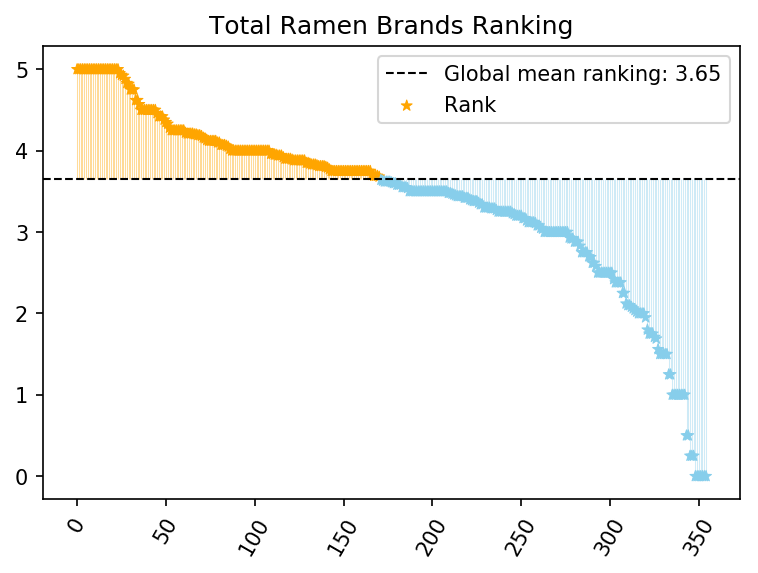

In [64]:
# Data
x = prueba.index
y = prueba.Rank
 
plt.figure(dpi=150)

# Create a color if the group is "B"
my_color=np.where(y>=mean, 'orange', 'skyblue')
 
# The vertival plot is made using the hline function
# I load the seaborn library only to benefit the nice looking feature
plt.vlines(x=x, ymin=mean, ymax=y, color=my_color, alpha=0.4,lw=0.5)
plt.scatter(x, y, color=my_color, s=30, alpha=1, lw=0.5, marker='*')

# Threshold
threshold=mean
# plt.plot([0,9], [threshold, threshold], "k--", lw=0.8, label='owo')
plt.axhline(y=mean, color='black', linestyle='--', lw=1, label='Global mean ranking: 3.65')
plt.legend()

# Add title and axis names
plt.xticks(rotation=60)
plt.title("Total Ramen Brands Ranking")

plt.show()
